<a href="https://colab.research.google.com/github/igcampos/Mestrado/blob/main/analise_de_sensibilidade_prog_um.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Sensibilidade do Programa I

In [214]:
#velocidade total
#delta x
#delta t
#numero de courant

In [215]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
from collections.abc import Iterable
import timeit

In [216]:
#Discretização do domínio 
nx = 100                                                              #Número de pontos do grid
dominio = np.arange(nx)                                                #vetor domínio
print("Número de dimensões: {}".format(dominio.ndim))                  #número de dimensões
print(dominio)

Número de dimensões: 1
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [217]:
#Calculo de Delta X
#tamanho do meio poroso
tam_meio_poroso = 5000 #ft
#tamanho do elemento do grid
tam_grid = tam_meio_poroso/nx
#Delta X - normalizado
dx = tam_grid/tam_meio_poroso
print("O tamanho dos elementos do grid em uma malha estruturada é {}, e o delta X é {} ".format(tam_grid, dx))

O tamanho dos elementos do grid em uma malha estruturada é 50.0, e o delta X é 0.01 


In [218]:
#Calculo de Delta T
#viscosidade da água 
#visc_agua = 0.5 #cp
#viscosidade do óleo
#visc_oleo = 1 #cp
#velocidade total na injeção 
ut = 0.1 #ft³/d 
#porosidade
porosidade_meio = 0.2
#tempo de simulação 
nt = 4000 #dias
#passo de tempo
passo_tempo = 10 #dias
#Delta T - normalizado
dt =  ut*passo_tempo/(tam_meio_poroso*porosidade_meio) 
print("O delta T normalizado é {}".format(dt))

O delta T normalizado é 0.001


In [219]:
#Número de Courant
num_Courant = dt/dx 
print(f"O número de courant é {num_Courant}")

O número de courant é 0.1


In [220]:
#condição de contorno e inicial
#Condição Inicial Sw(X,0)
sw_CI = 0.2 #swi
#Condição de Contorno Sw(0,T)
sw_CC = 0.8 #1-sor
#Matriz de saturação para alocação dos resultados
tempos_de_injecao = int(nt/passo_tempo)   #quantidade representando os tempos de injeção que serão calculados
matriz_resultado_saturacao = np.zeros((tempos_de_injecao,nx)) 
matriz_resultado_saturacao.shape 

(400, 100)

In [221]:
#modificando a primeira linha da matriz para alocar os valores das condições iniciais
matriz_resultado_saturacao[0,:] = sw_CI 

In [222]:
matriz_resultado_saturacao[0,:] 

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

In [223]:
#Características do sistema molhável a água
#saturação inicial
swi = 0.2
#saturação de óleo residual
sor = 0.2
#permeabilidade relativa da água na saturação residual
krw_sor = 0.3 
#permeabilidade relativa do óleo na saturação residual
kro_swi = 0.85 
#porosidade
porosidade = porosidade_meio
#parâmetros de Corey
no = 3
nw = 6

In [224]:
tempos_de_injecao = np.arange(tempos_de_injecao) #utilizado como vetor de tempo para o calculo de saturação
tempos_de_injecao

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [225]:
#função para o cálculo do modelo Corey - AJUSTADO

def perm_corey(sw,swi,sor,kro_swi,krw_sor,no,nw):
  kro = []
  krw = []

  if isinstance(sw, Iterable):
    #cálculo da permeabilidade relativa do óleo 
    for i in sw:
        kr = kro_swi*((1-sor-i)/(1-swi-sor))**no
        kro.append(kr)
    kro = np.array([kro_swi if i >= 1 else i for i in kro]) #substituindo o valor 1 por kro_swi
    kro[-1] = 0.0 # solução temporária para o erro 

    #cálculo da permeabilidade relativa da água
    for i in sw:
        kr = krw_sor*((i-swi)/(1-swi-sor))**nw
        if kr > krw_sor:
          kr = krw_sor
        krw.append(kr)
    krw = np.array(krw)


  else:
    #cálculo da permeabilidade relativa do óleo
    kr = kro_swi*((1-sor-sw)/(1-swi-sor))**no
    if kr > kro_swi:
      kr = kro_swi
    kro.append(kr)
    kro = np.array(kro) 
    #cálculo da permeabilidade relativa da água 
    kr = krw_sor*((sw-swi)/(1-swi-sor))**nw
    if kr > krw_sor:
      kr = krw_sor
    krw.append(kr)
    krw = np.array(krw)
  
  return kro, krw

#função que calcula a mobilidade em diferentes pontos de saturação
def mobilidade(sw,visc_agua,visc_oleo):

  numerador_da_funcao = perm_corey(sw,swi,sor,kro_swi,krw_sor,no,nw)[1]/visc_agua
  denominador_da_funcao = (perm_corey(sw,swi,sor,kro_swi,krw_sor,no,nw)[1]/visc_agua) + (perm_corey(sw,swi,sor,kro_swi,krw_sor,no,nw)[0]/visc_oleo)
  resultado_mobilidade =  numerador_da_funcao/denominador_da_funcao

  return resultado_mobilidade

In [226]:
#Calculo da saturação explicitamente utilizando o método single point upstream (ϕ=0)
#calulo do tempo de execução:
start = timeit.default_timer()
for n in tempos_de_injecao:
  #calculo da primeira linha
  if n == 0:
    for i in dominio:
      if i == 0: 
        #primeiro ponto
        mobilidade_i_menos_meio = mobilidade(sw_CC,visc_agua,visc_oleo)
        mobilidade_i = mobilidade(sw_CI,visc_agua,visc_oleo)
        sw_n_mais_1 = dt/dx*(mobilidade_i_menos_meio - mobilidade_i) + sw_CI
        matriz_resultado_saturacao[n,i] =  sw_n_mais_1
      else:
        #outros ponto
        sw_ajustado =  sw_CI
        mobilidade_i_menos_meio = mobilidade(sw_ajustado,visc_agua,visc_oleo)
        mobilidade_i = mobilidade(sw_CI,visc_agua,visc_oleo)
        sw_n_mais_1 = dt/dx * (mobilidade_i_menos_meio - mobilidade_i) + sw_CI
        matriz_resultado_saturacao[n,i] =  sw_n_mais_1
  #Cálculo das demais linhas      
  else:
      for i in dominio:
        if i == 0: 
          #primeiro ponto
          mobilidade_i_menos_meio = mobilidade(sw_CC,visc_agua,visc_oleo)
          mobilidade_i = mobilidade(matriz_resultado_saturacao[n-1,i],visc_agua,visc_oleo)
          sw_n_mais_1 = dt/dx*(mobilidade_i_menos_meio - mobilidade_i) + matriz_resultado_saturacao[n-1,i]
          matriz_resultado_saturacao[n,i] =  sw_n_mais_1
        else:
          #outros ponto
          sw_ajustado =  matriz_resultado_saturacao[n-1,i-1] 
          mobilidade_i_menos_meio = mobilidade(sw_ajustado,visc_agua,visc_oleo)
          mobilidade_i = mobilidade(matriz_resultado_saturacao[n-1,i],visc_agua,visc_oleo)
          sw_n_mais_1 = dt/dx * (mobilidade_i_menos_meio - mobilidade_i) + matriz_resultado_saturacao[n-1,i]
          matriz_resultado_saturacao[n,i] =  sw_n_mais_1
matriz_resultado_saturacao_single_point = matriz_resultado_saturacao
stop = timeit.default_timer()
print('Tempo de execução: {} segundos'.format(stop-start))

Tempo de execução: 2.704199732000234 segundos


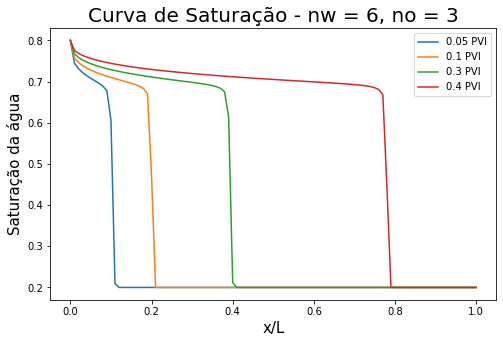

In [227]:
#plotar os resultados
matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#PVI utilizados nos labels
td_label_1= ut*500/(tam_meio_poroso*porosidade_meio)
td_label_2= ut*1000/(tam_meio_poroso*porosidade_meio)
td_label_3= ut*3000/(tam_meio_poroso*porosidade_meio)
td_label_4= ut*4000/(tam_meio_poroso*porosidade_meio)

ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[49], label = "{} PVI".format(td_label_1))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[99], label = "{} PVI".format(td_label_2))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[199], label = "{} PVI".format(td_label_3))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[399], label = "{} PVI".format(td_label_4))


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = {}, no = {}".format(nw,no), fontsize=20)
ax.legend(loc="upper right")
plt.show()

## Análise do refino da malha





In [17]:
#armazenando os vetores com os diferentes refino de 0,2 PVI
nx_100 = matriz_resultado_saturacao_single_point[199] #pronto

In [30]:
nx_10 = matriz_resultado_saturacao_single_point[199] #pronto

In [45]:
nx_20 = matriz_resultado_saturacao_single_point[199] #pronto

In [60]:
nx_30 = matriz_resultado_saturacao_single_point[199] #pronto

In [75]:
nx_40 = matriz_resultado_saturacao_single_point[199] #pronto

In [90]:
nx_50 = matriz_resultado_saturacao_single_point[199] #pronto

In [105]:
nx_60 = matriz_resultado_saturacao_single_point[199] #pronto

In [120]:
nx_70 = matriz_resultado_saturacao_single_point[199] #pronto

In [135]:
nx_80 = matriz_resultado_saturacao_single_point[199] #pronto

In [150]:
nx_90 = matriz_resultado_saturacao_single_point[199] #pronto

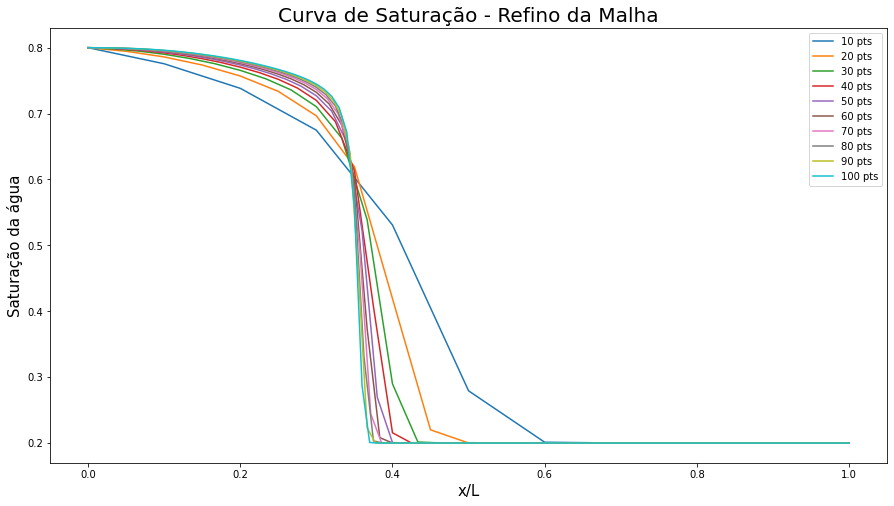

In [162]:
#Gráfico analisando o refino da malha
#Adicionando o ponto referente a condição de contorno
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) 
vetor_comprimento_10 = np.linspace(0, 1, 10+1)
vetor_comprimento_20 = np.linspace(0, 1, 20+1)
vetor_comprimento_30 = np.linspace(0, 1, 30+1)
vetor_comprimento_40 = np.linspace(0, 1, 40+1)
vetor_comprimento_50 = np.linspace(0, 1, 50+1)
vetor_comprimento_60 = np.linspace(0, 1, 60+1)
vetor_comprimento_70 = np.linspace(0, 1, 70+1)
vetor_comprimento_80 = np.linspace(0, 1, 80+1)
vetor_comprimento_90 = np.linspace(0, 1, 90+1)
vetor_comprimento_100 = np.linspace(0, 1, 100+1)

fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,1,1)


ax.plot(vetor_comprimento_10, nx_10, label = "10 pts")
ax.plot(vetor_comprimento_20, nx_20, label = "20 pts")
ax.plot(vetor_comprimento_30, nx_30, label = "30 pts")
ax.plot(vetor_comprimento_40, nx_40, label = "40 pts")
ax.plot(vetor_comprimento_50, nx_50, label = "50 pts")
ax.plot(vetor_comprimento_60, nx_60, label = "60 pts")
ax.plot(vetor_comprimento_70, nx_70, label = "70 pts")
ax.plot(vetor_comprimento_80, nx_80, label = "80 pts")
ax.plot(vetor_comprimento_90, nx_90, label = "90 pts")
ax.plot(vetor_comprimento_100, nx_100, label = "100 pts")



ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - Refino da Malha", fontsize=20)
ax.legend(loc="upper right")
plt.show()

In [177]:
#análise com 100, 200, 300 e 400 pontos
nx_200 = matriz_resultado_saturacao_single_point[199] #pronto

In [221]:
nx_300 = matriz_resultado_saturacao_single_point[199] #pronto

In [206]:
nx_400 = matriz_resultado_saturacao_single_point[199] #pronto

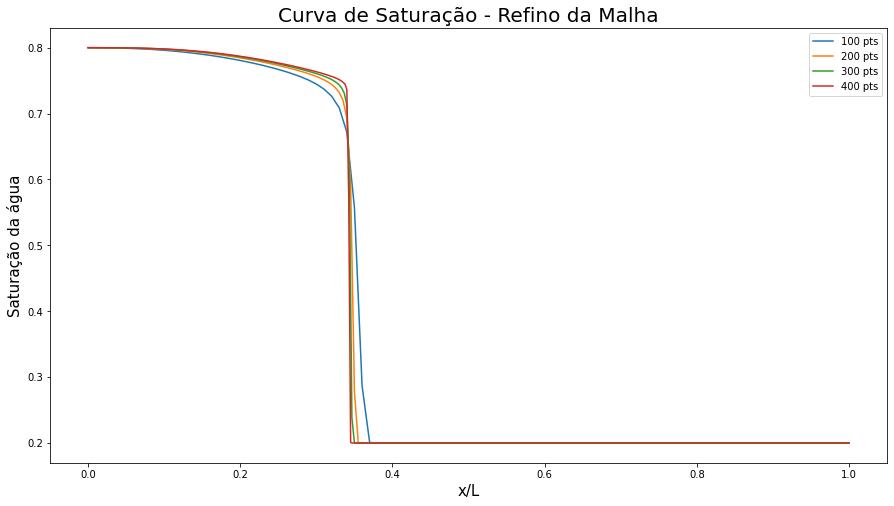

In [222]:
#Gráfico analisando o refino da malha
#Adicionando o ponto referente a condição de contorno
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) 

vetor_comprimento_200 = np.linspace(0, 1, 200+1)
vetor_comprimento_300 = np.linspace(0, 1, 300+1)
vetor_comprimento_400 = np.linspace(0, 1, 400+1)
vetor_comprimento_100 = np.linspace(0, 1, 100+1)

fig = plt.figure(figsize=(15,8))
ax = plt.subplot(1,1,1)

ax.plot(vetor_comprimento_100, nx_100, label = "100 pts")
ax.plot(vetor_comprimento_200, nx_200, label = "200 pts")
ax.plot(vetor_comprimento_300, nx_300, label = "300 pts")
ax.plot(vetor_comprimento_400, nx_400, label = "400 pts")



ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - Refino da Malha", fontsize=20)
ax.legend(loc="upper right")
plt.show()

## Análise dos parâmetros de Corey

### nw=no

In [226]:
#Parâmetros de Corey nw=no
# nw = 2,4,6,8
nw = 8
no = nw



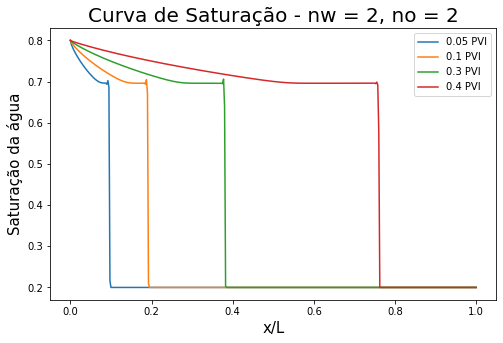

In [54]:
#nw=no=2
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#PVI utilizados nos labels
td_label_1= ut*500/(tam_meio_poroso*porosidade_meio)
td_label_2= ut*1000/(tam_meio_poroso*porosidade_meio)
td_label_3= ut*3000/(tam_meio_poroso*porosidade_meio)
td_label_4= ut*4000/(tam_meio_poroso*porosidade_meio)

ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[49], label = "{} PVI".format(td_label_1))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[99], label = "{} PVI".format(td_label_2))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[199], label = "{} PVI".format(td_label_3))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[399], label = "{} PVI".format(td_label_4))


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = {}, no = {}".format(nw,no), fontsize=20)
ax.legend(loc="upper right")
plt.show()

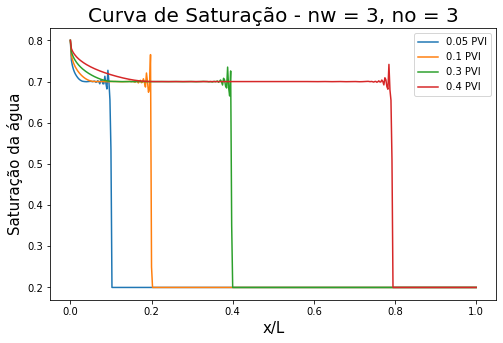

In [38]:
#nw=no=3
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#PVI utilizados nos labels
td_label_1= ut*500/(tam_meio_poroso*porosidade_meio)
td_label_2= ut*1000/(tam_meio_poroso*porosidade_meio)
td_label_3= ut*3000/(tam_meio_poroso*porosidade_meio)
td_label_4= ut*4000/(tam_meio_poroso*porosidade_meio)

ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[49], label = "{} PVI".format(td_label_1))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[99], label = "{} PVI".format(td_label_2))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[199], label = "{} PVI".format(td_label_3))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[399], label = "{} PVI".format(td_label_4))


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = {}, no = {}".format(nw,no), fontsize=20)
ax.legend(loc="upper right")
plt.show()

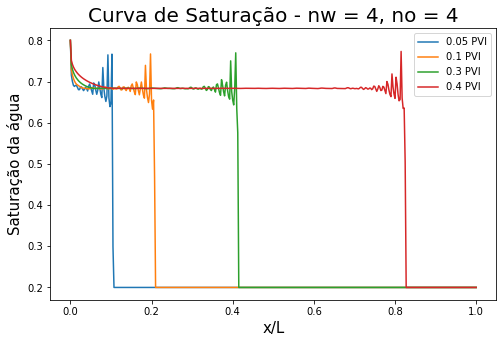

In [70]:
#nw=no=4
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#PVI utilizados nos labels
td_label_1= ut*500/(tam_meio_poroso*porosidade_meio)
td_label_2= ut*1000/(tam_meio_poroso*porosidade_meio)
td_label_3= ut*3000/(tam_meio_poroso*porosidade_meio)
td_label_4= ut*4000/(tam_meio_poroso*porosidade_meio)

ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[49], label = "{} PVI".format(td_label_1))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[99], label = "{} PVI".format(td_label_2))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[199], label = "{} PVI".format(td_label_3))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[399], label = "{} PVI".format(td_label_4))


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = {}, no = {}".format(nw,no), fontsize=20)
ax.legend(loc="upper right")
plt.show()

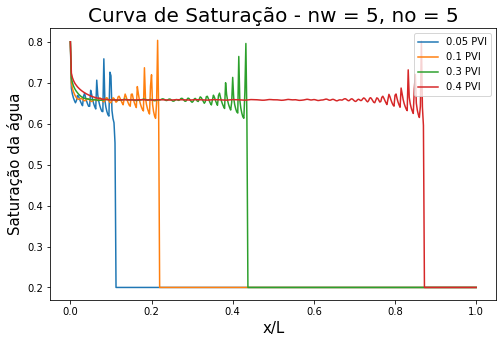

In [116]:
#nw=no=5
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#PVI utilizados nos labels
td_label_1= ut*500/(tam_meio_poroso*porosidade_meio)
td_label_2= ut*1000/(tam_meio_poroso*porosidade_meio)
td_label_3= ut*3000/(tam_meio_poroso*porosidade_meio)
td_label_4= ut*4000/(tam_meio_poroso*porosidade_meio)

ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[49], label = "{} PVI".format(td_label_1))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[99], label = "{} PVI".format(td_label_2))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[199], label = "{} PVI".format(td_label_3))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[399], label = "{} PVI".format(td_label_4))


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = {}, no = {}".format(nw,no), fontsize=20)
ax.legend(loc="upper right")
plt.show()

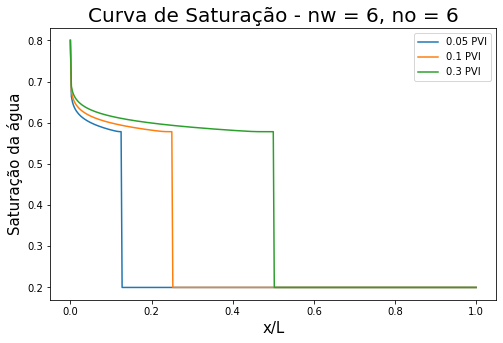

In [133]:
#nw=no=6
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#PVI utilizados nos labels
td_label_1= ut*500/(tam_meio_poroso*porosidade_meio)
td_label_2= ut*1000/(tam_meio_poroso*porosidade_meio)
td_label_3= ut*3000/(tam_meio_poroso*porosidade_meio)
td_label_4= ut*4000/(tam_meio_poroso*porosidade_meio)

ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[49], label = "{} PVI".format(td_label_1))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[99], label = "{} PVI".format(td_label_2))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[199], label = "{} PVI".format(td_label_3))
#ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[399], label = "{} PVI".format(td_label_4))


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = {}, no = {}".format(nw,no), fontsize=20)
ax.legend(loc="upper right")
plt.show()

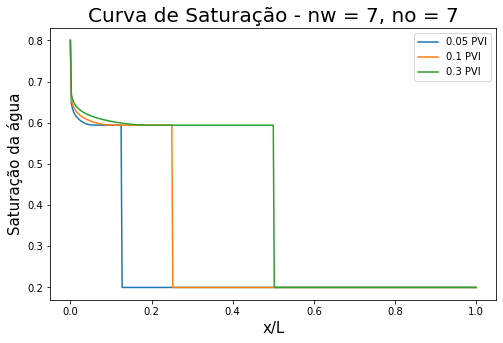

In [149]:
#nw=no=7
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#PVI utilizados nos labels
td_label_1= ut*500/(tam_meio_poroso*porosidade_meio)
td_label_2= ut*1000/(tam_meio_poroso*porosidade_meio)
td_label_3= ut*3000/(tam_meio_poroso*porosidade_meio)
td_label_4= ut*4000/(tam_meio_poroso*porosidade_meio)

ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[49], label = "{} PVI".format(td_label_1))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[99], label = "{} PVI".format(td_label_2))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[199], label = "{} PVI".format(td_label_3))
#ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[399], label = "{} PVI".format(td_label_4))


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = {}, no = {}".format(nw,no), fontsize=20)
ax.legend(loc="upper right")
plt.show()

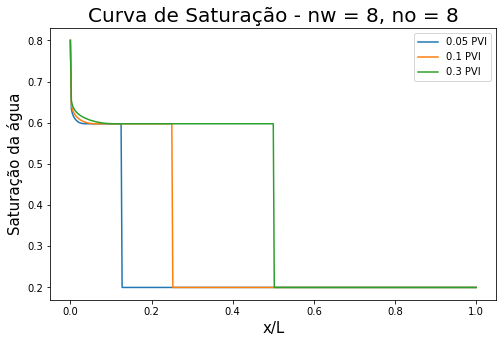

In [166]:
#nw=no=8
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)

#PVI utilizados nos labels
td_label_1= ut*500/(tam_meio_poroso*porosidade_meio)
td_label_2= ut*1000/(tam_meio_poroso*porosidade_meio)
td_label_3= ut*3000/(tam_meio_poroso*porosidade_meio)
td_label_4= ut*4000/(tam_meio_poroso*porosidade_meio)

ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[49], label = "{} PVI".format(td_label_1))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[99], label = "{} PVI".format(td_label_2))
ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[199], label = "{} PVI".format(td_label_3))
#ax.plot(vetor_comprimento, matriz_resultado_saturacao_single_point[399], label = "{} PVI".format(td_label_4))


ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = {}, no = {}".format(nw,no), fontsize=20)
ax.legend(loc="upper right")
plt.show()

### Parâmetros de Corey retirados do trabalho de Behrenbruch 2006

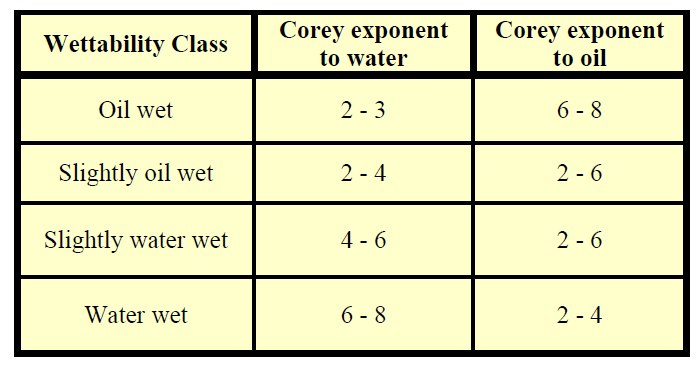

In [68]:
#Será utilizado o sistema water-wet 
#nw = 6 - 8
#no = 2 -4
nw = 6
no = 4

In [16]:
nw_no_6_2 = matriz_resultado_saturacao_single_point  #pronto

In [32]:
nw_no_7_2 = matriz_resultado_saturacao_single_point #pronto

In [48]:
nw_no_8_2 = matriz_resultado_saturacao_single_point #pronto

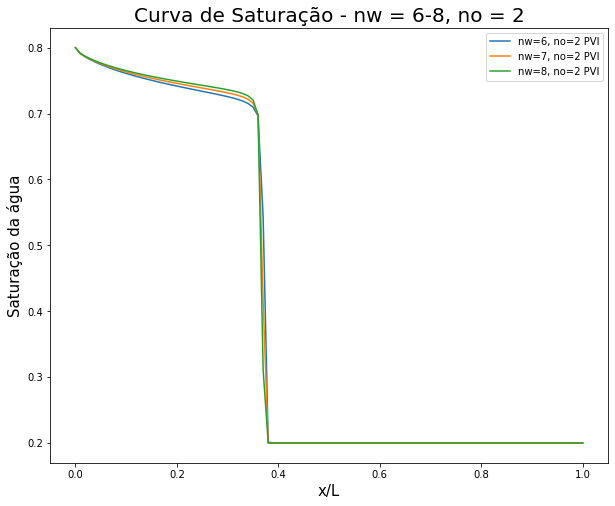

In [51]:
#nw=6-7, no=2
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)

ax.plot(vetor_comprimento, nw_no_6_2[199], label = "nw=6, no=2 PVI")
ax.plot(vetor_comprimento, nw_no_7_2[199], label = "nw=7, no=2 PVI")
ax.plot(vetor_comprimento, nw_no_8_2[199], label = "nw=8, no=2 PVI")

ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = 6-8, no = 2", fontsize=20)
ax.legend(loc="upper right")
plt.show()

In [67]:
nw_no_6_3 = matriz_resultado_saturacao_single_point  #pronto

In [83]:
nw_no_6_4 = matriz_resultado_saturacao_single_point  #pronto

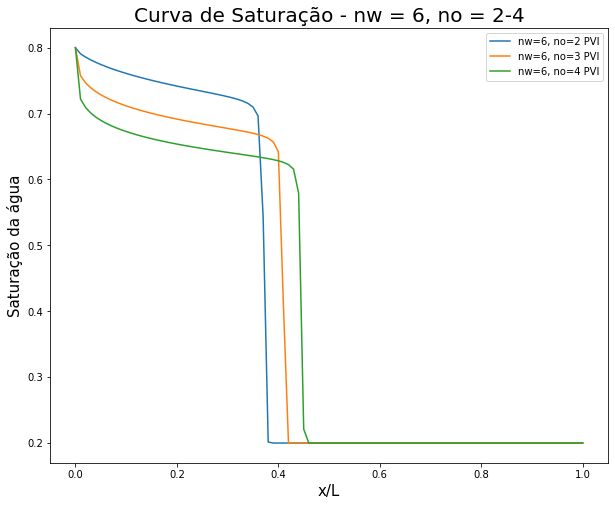

In [84]:
#nw=6, no=2-4
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)

ax.plot(vetor_comprimento, nw_no_6_2[199], label = "nw=6, no=2 PVI")
ax.plot(vetor_comprimento, nw_no_6_3[199], label = "nw=6, no=3 PVI")
ax.plot(vetor_comprimento, nw_no_6_4[199], label = "nw=6, no=4 PVI")

ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - nw = 6, no = 2-4", fontsize=20)
ax.legend(loc="upper right")
plt.show()

## Análise das viscosidades

In [183]:
#análise das viscosidades
#μo/μw = 1,2,3,4
visc_agua = 1
visc_oleo = 1
razao_visc = visc_oleo/visc_agua
razao_visc

1.0

In [198]:
razao_visc_1 = matriz_resultado_saturacao_single_point #pronto

In [148]:
razao_visc_2 = matriz_resultado_saturacao_single_point #pronto

In [165]:
razao_visc_3 = matriz_resultado_saturacao_single_point #pronto

In [181]:
razao_visc_4 = matriz_resultado_saturacao_single_point #pronto

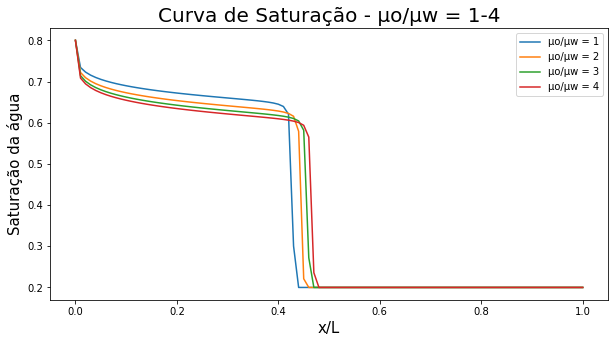

In [228]:
#plotar os resultados
#matriz_resultado_saturacao_single_point = np.insert(matriz_resultado_saturacao_single_point, 0, values = 0.8, axis=1) #Adicionando o ponto referente a condição de contorno
vetor_comprimento = np.linspace(0, 1, nx+1)
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(1,1,1)

ax.plot(vetor_comprimento, razao_visc_1[199], label = "μo/μw = 1")
ax.plot(vetor_comprimento, razao_visc_2[199], label = "μo/μw = 2")
ax.plot(vetor_comprimento, razao_visc_3[199], label = "μo/μw = 3")
ax.plot(vetor_comprimento, razao_visc_4[199], label = "μo/μw = 4")

ax.set_xlabel("x/L", fontsize=15)
ax.set_ylabel("Saturação da água", fontsize=15)
plt.title("Curva de Saturação - μo/μw = 1-4", fontsize=20)
ax.legend(loc="upper right")
plt.show()